In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('test_energy_data.csv')
df.head(3)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83


In [3]:
df.info() #checking data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [4]:
# checking null values
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

OBSERVATION -  no null values


In [5]:
df['Day of Week']=np.where(df['Day of Week'].str.contains('Weekday'),0,1)

In [6]:
df['Day of Week'].value_counts()

Day of Week
1    56
0    44
Name: count, dtype: int64

In [7]:
# dictt={'Residential':1,'Commercial':2,'Industrial':3}
df['Building Type']=df['Building Type'].map({'Residential':1,'Commercial':2,'Industrial':3})

In [8]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    int64  
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    int32  
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 5.2 KB


## LINEAR REGRESSION

In [10]:
x=df.drop(['Energy Consumption'],axis=1)
y=df['Energy Consumption']

In [11]:
x

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,1,24563,15,4,28.52,0
1,2,27583,56,23,23.07,1
2,2,45313,4,44,33.56,0
3,1,41625,84,17,27.39,1
4,1,36720,58,47,17.08,0
...,...,...,...,...,...,...
95,2,1161,81,11,15.45,1
96,1,37943,50,23,21.73,1
97,2,1558,27,29,16.86,1
98,3,2145,56,12,11.77,1


In [12]:
y

0     2865.57
1     4283.80
2     5067.83
3     4624.30
4     4820.59
       ...   
95    3010.81
96    4248.49
97    2843.60
98    3348.39
99    4722.59
Name: Energy Consumption, Length: 100, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [14]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [15]:
# regression

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_scaled,y_train)


LinearRegression()

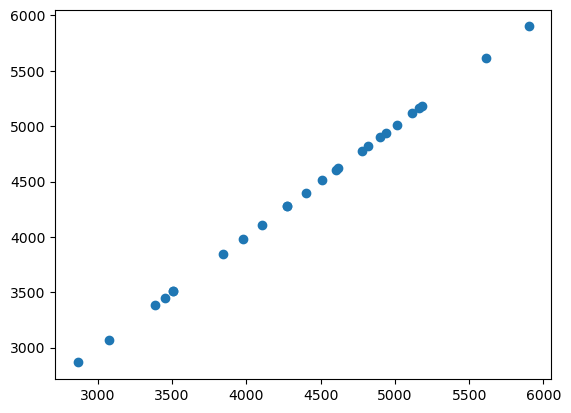

In [16]:
y_pred=regression.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()

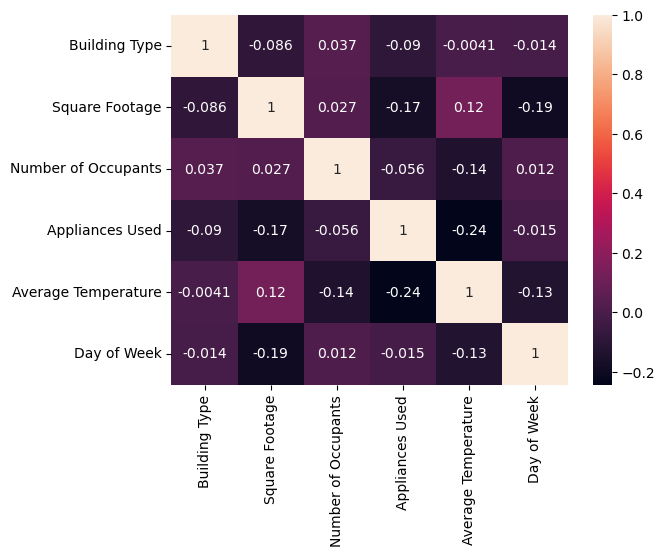

In [17]:
# correlation and heatmap

corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

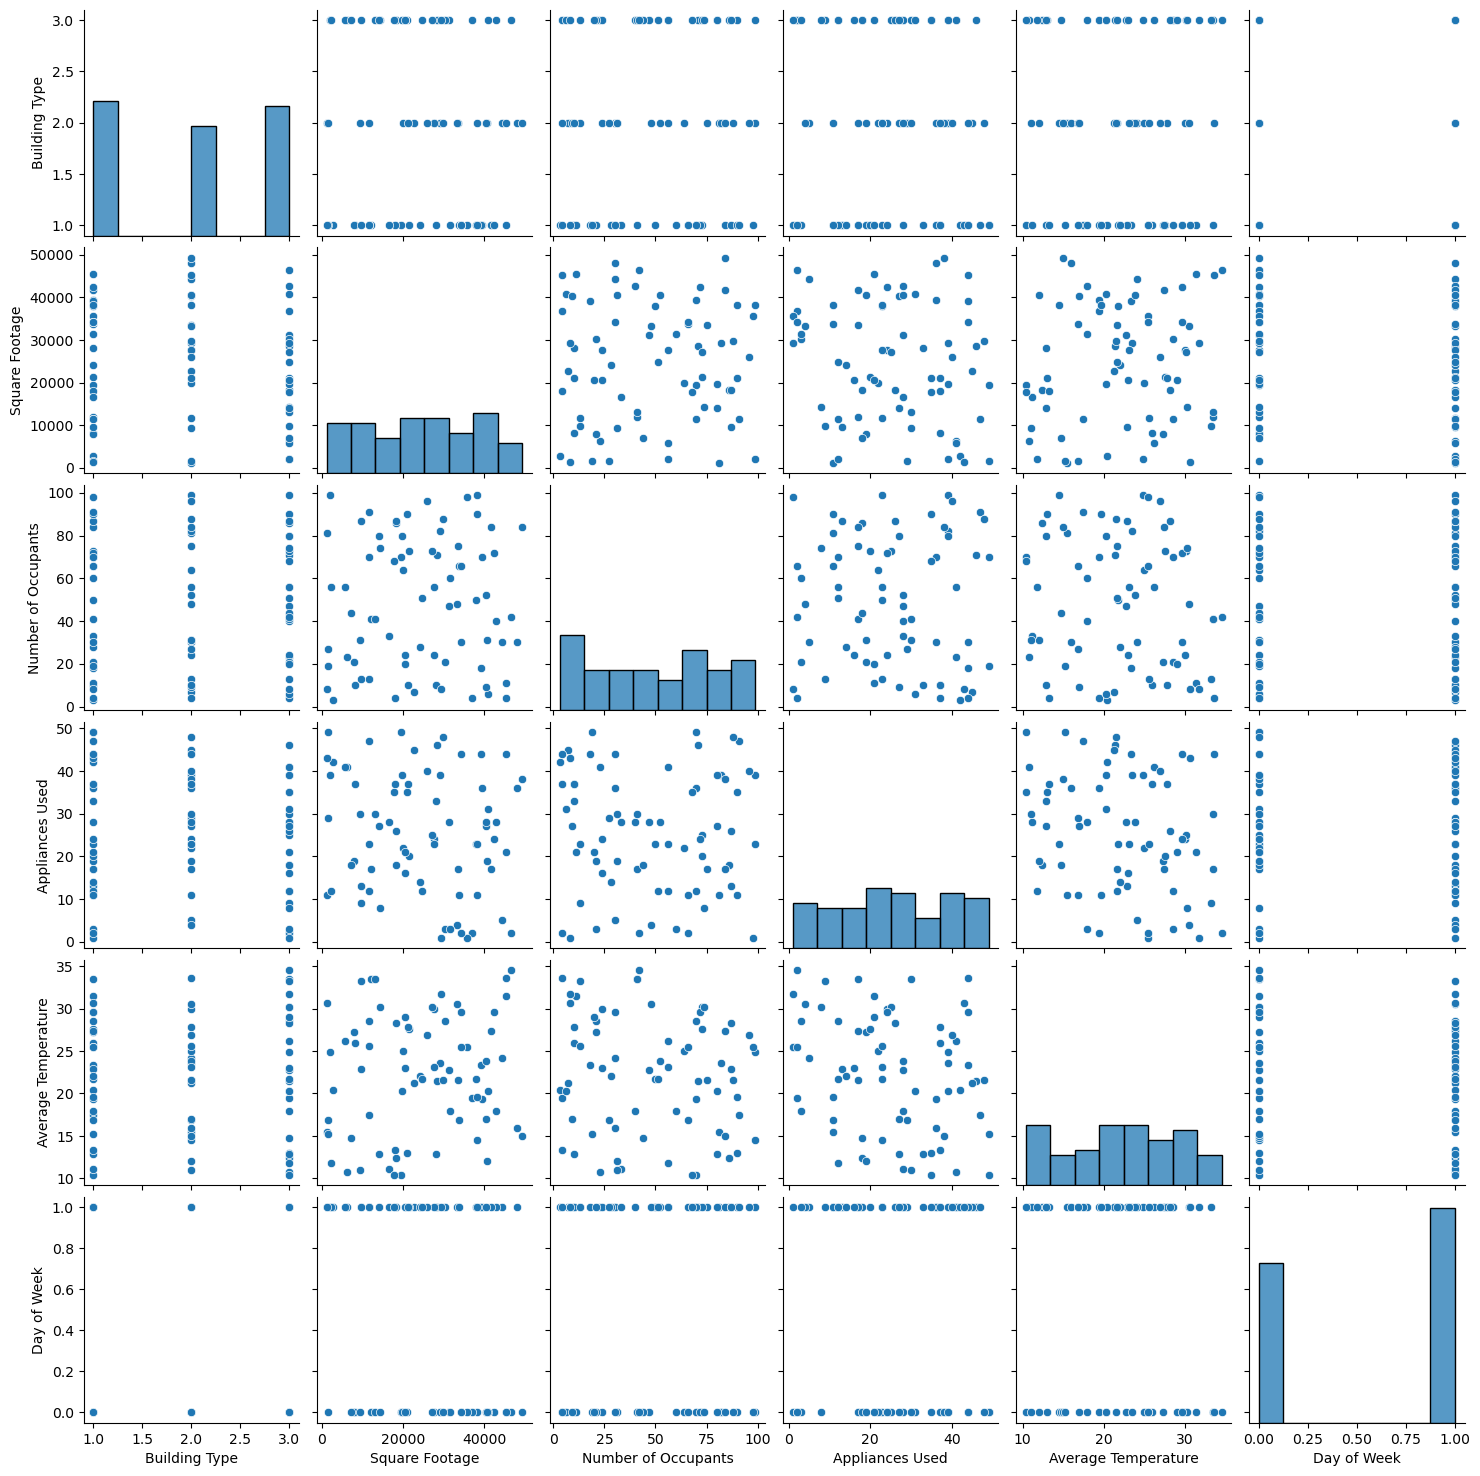

In [18]:
# pairplots
sns.pairplot(x_train)
plt.show()

In [19]:
# performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = regression.predict(x_test_scaled)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.011738287516564014
MSE: 0.00020724026009840167
R2 Score: 0.9999999996544069
